In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
A, b = datasets.load_diabetes(return_X_y=True)

In [3]:
A_pinv = np.linalg.pinv(A)
x_star = A_pinv @ b
err = .5 * np.linalg.norm(A @ x_star - b) ** 2
print(' error = {:.3e}'.format( err))

 error = 5.747e+06


In [4]:
# our parameters for gradient descent
n = 10  # length of initial vector
k = 10000 # number of iterations
eps = 1e-2 # step size
l = 4 # error allowed

In [5]:
err_fun = lambda x: .5 * np.linalg.norm(A @ x - b) ** 2  # returns value of f(x)

In [6]:
# gradient descent
x0 = np.random.rand(n)
xk = x0
errors_array = []
for jj in range(k):
    grad = (A.T @ A) @ xk - A.T @ b
    xk = xk - eps * grad
    err = err_fun(xk)
    if (jj %(k/10) == 0):
        print('GD, iter {}, error = {:.3e}'.format(jj, err))
    errors_array.append(err)
    if np.linalg.norm(grad) < l:
        print(f'GD converged after {jj} iterations')
        break

GD, iter 0, error = 6.386e+06
GD, iter 1000, error = 5.751e+06
GD, iter 2000, error = 5.750e+06
GD, iter 3000, error = 5.750e+06
GD, iter 4000, error = 5.749e+06
GD, iter 5000, error = 5.749e+06
GD, iter 6000, error = 5.749e+06
GD, iter 7000, error = 5.748e+06
GD, iter 8000, error = 5.748e+06
GD, iter 9000, error = 5.748e+06
GD converged after 9729 iterations


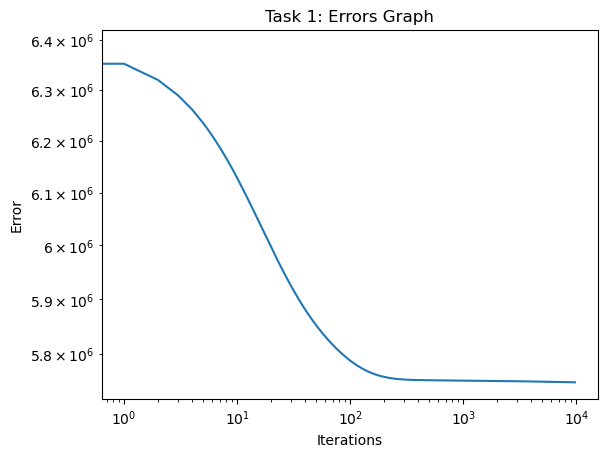

In [7]:
X = np.stack(errors_array)
plt.plot(X)
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.title("Task 1: Errors Graph")
plt.yscale('log')
plt.xscale('log')
plt.show()